In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
column_names=['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type']

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv", names=column_names)
#df=df.set_index('Id')
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.shape

(214, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          214 non-null    int64  
 1   RI          214 non-null    float64
 2   Na          214 non-null    float64
 3   Mg          214 non-null    float64
 4   Al          214 non-null    float64
 5   Si          214 non-null    float64
 6   K           214 non-null    float64
 7   Ca          214 non-null    float64
 8   Ba          214 non-null    float64
 9   Fe          214 non-null    float64
 10  Glass_type  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df=df.drop("Id", axis=1)
df.shape

(214, 10)

In [7]:
df.isnull().sum().sum()

0

No null values

In [8]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [9]:
df=df.drop_duplicates()

In [10]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type


In [11]:
df["Glass_type"].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [12]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


We need to scale the data as the values are uneven for different columns.

Almost all features appear to be skewed and 'K' and 'Ba' seems to have outliers observing the quartiles.

Also looking at the details of Target variable, we can observe that the data is not balanced, which can be confirmed later by getting value counts.

In [13]:
df["Glass_type"].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

Here, type 1 and 2 are present in the huge amount making the data unbalanced.

In [14]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type'], dtype='object')

In [15]:
# getting average content of elements that are used in Glass manufacturing
avg={}
for i in df.columns:
    if i == 'Glass_type':
        break
    avg.update({i: df[i].values.mean()})
    
avg

{'RI': 1.5183477464788733,
 'Na': 13.404084507042256,
 'Mg': 2.679201877934272,
 'Al': 1.4494835680751175,
 'Si': 72.6550704225352,
 'K': 0.49887323943661965,
 'Ca': 8.954084507042255,
 'Ba': 0.17586854460093898,
 'Fe': 0.05727699530516432}

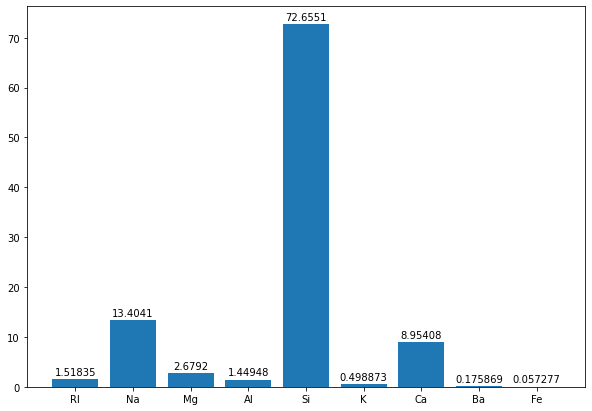

In [16]:
fig,ax= plt.subplots(figsize=(10,7))
plt.bar(avg.keys(), avg.values())

for a in ax.containers:
    ax.bar_label(a, padding=2)
plt.show()

Here, we can see that the content of silica is huge (about 72%) which is obivous as it is the main content for anytime of glass.

We can feel the need of scaling from the above figure because of the difference in values.

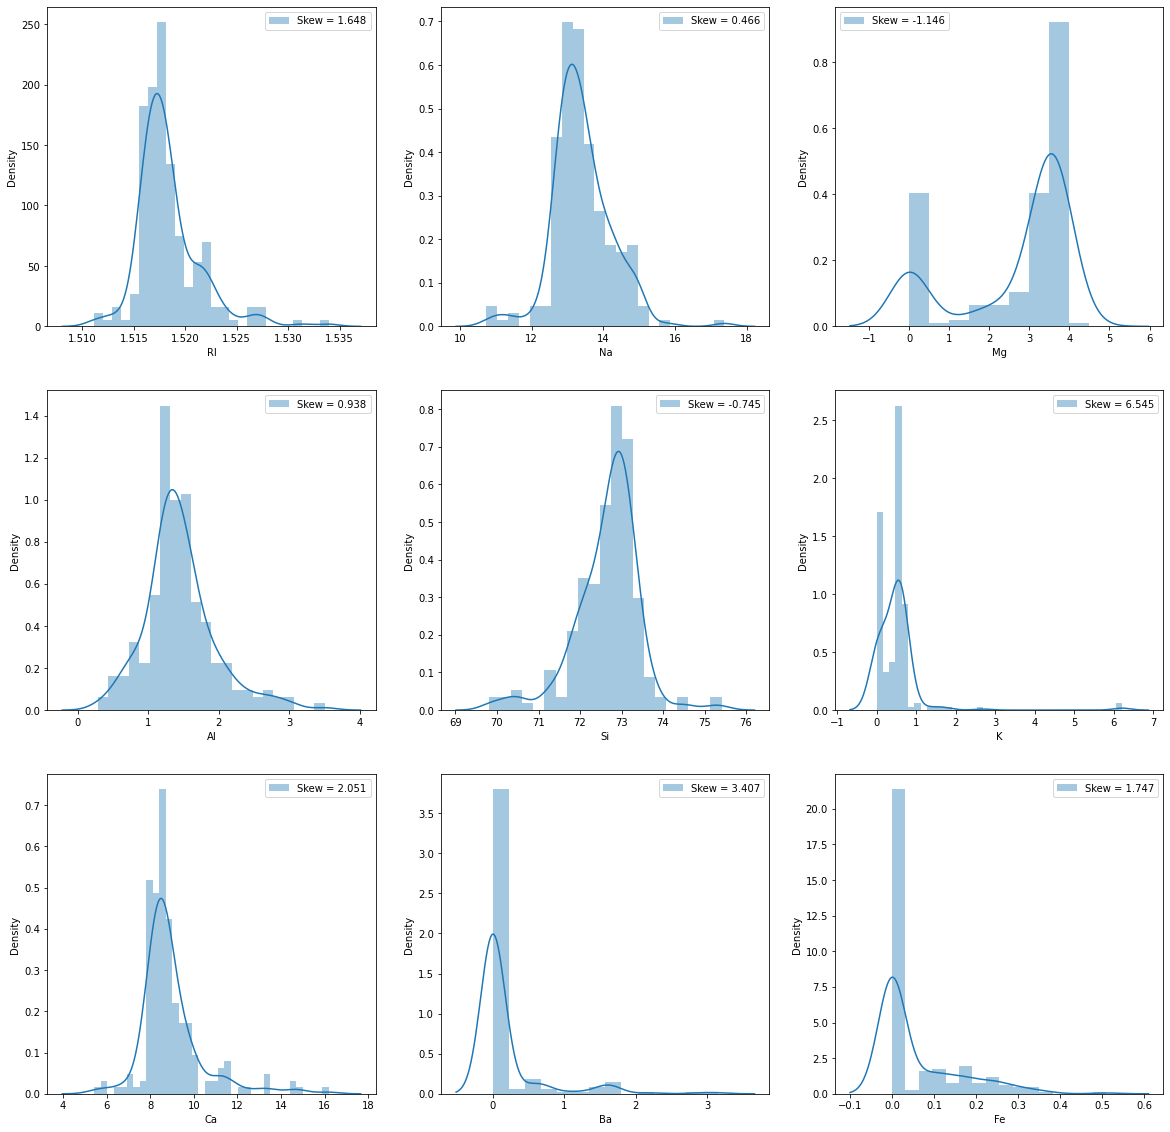

In [17]:
plt.figure(figsize=(20,20))
c=1

for i in df:
    if c<=9:
        skew= df[i].skew()
        ax=plt.subplot(3,3,c)
        sns.distplot(df[i],label='Skew = %.3f' %(skew))
        plt.legend()
    c+=1

Every column seems to be skewed. while, last 4 subplots seems to be highly skewed.

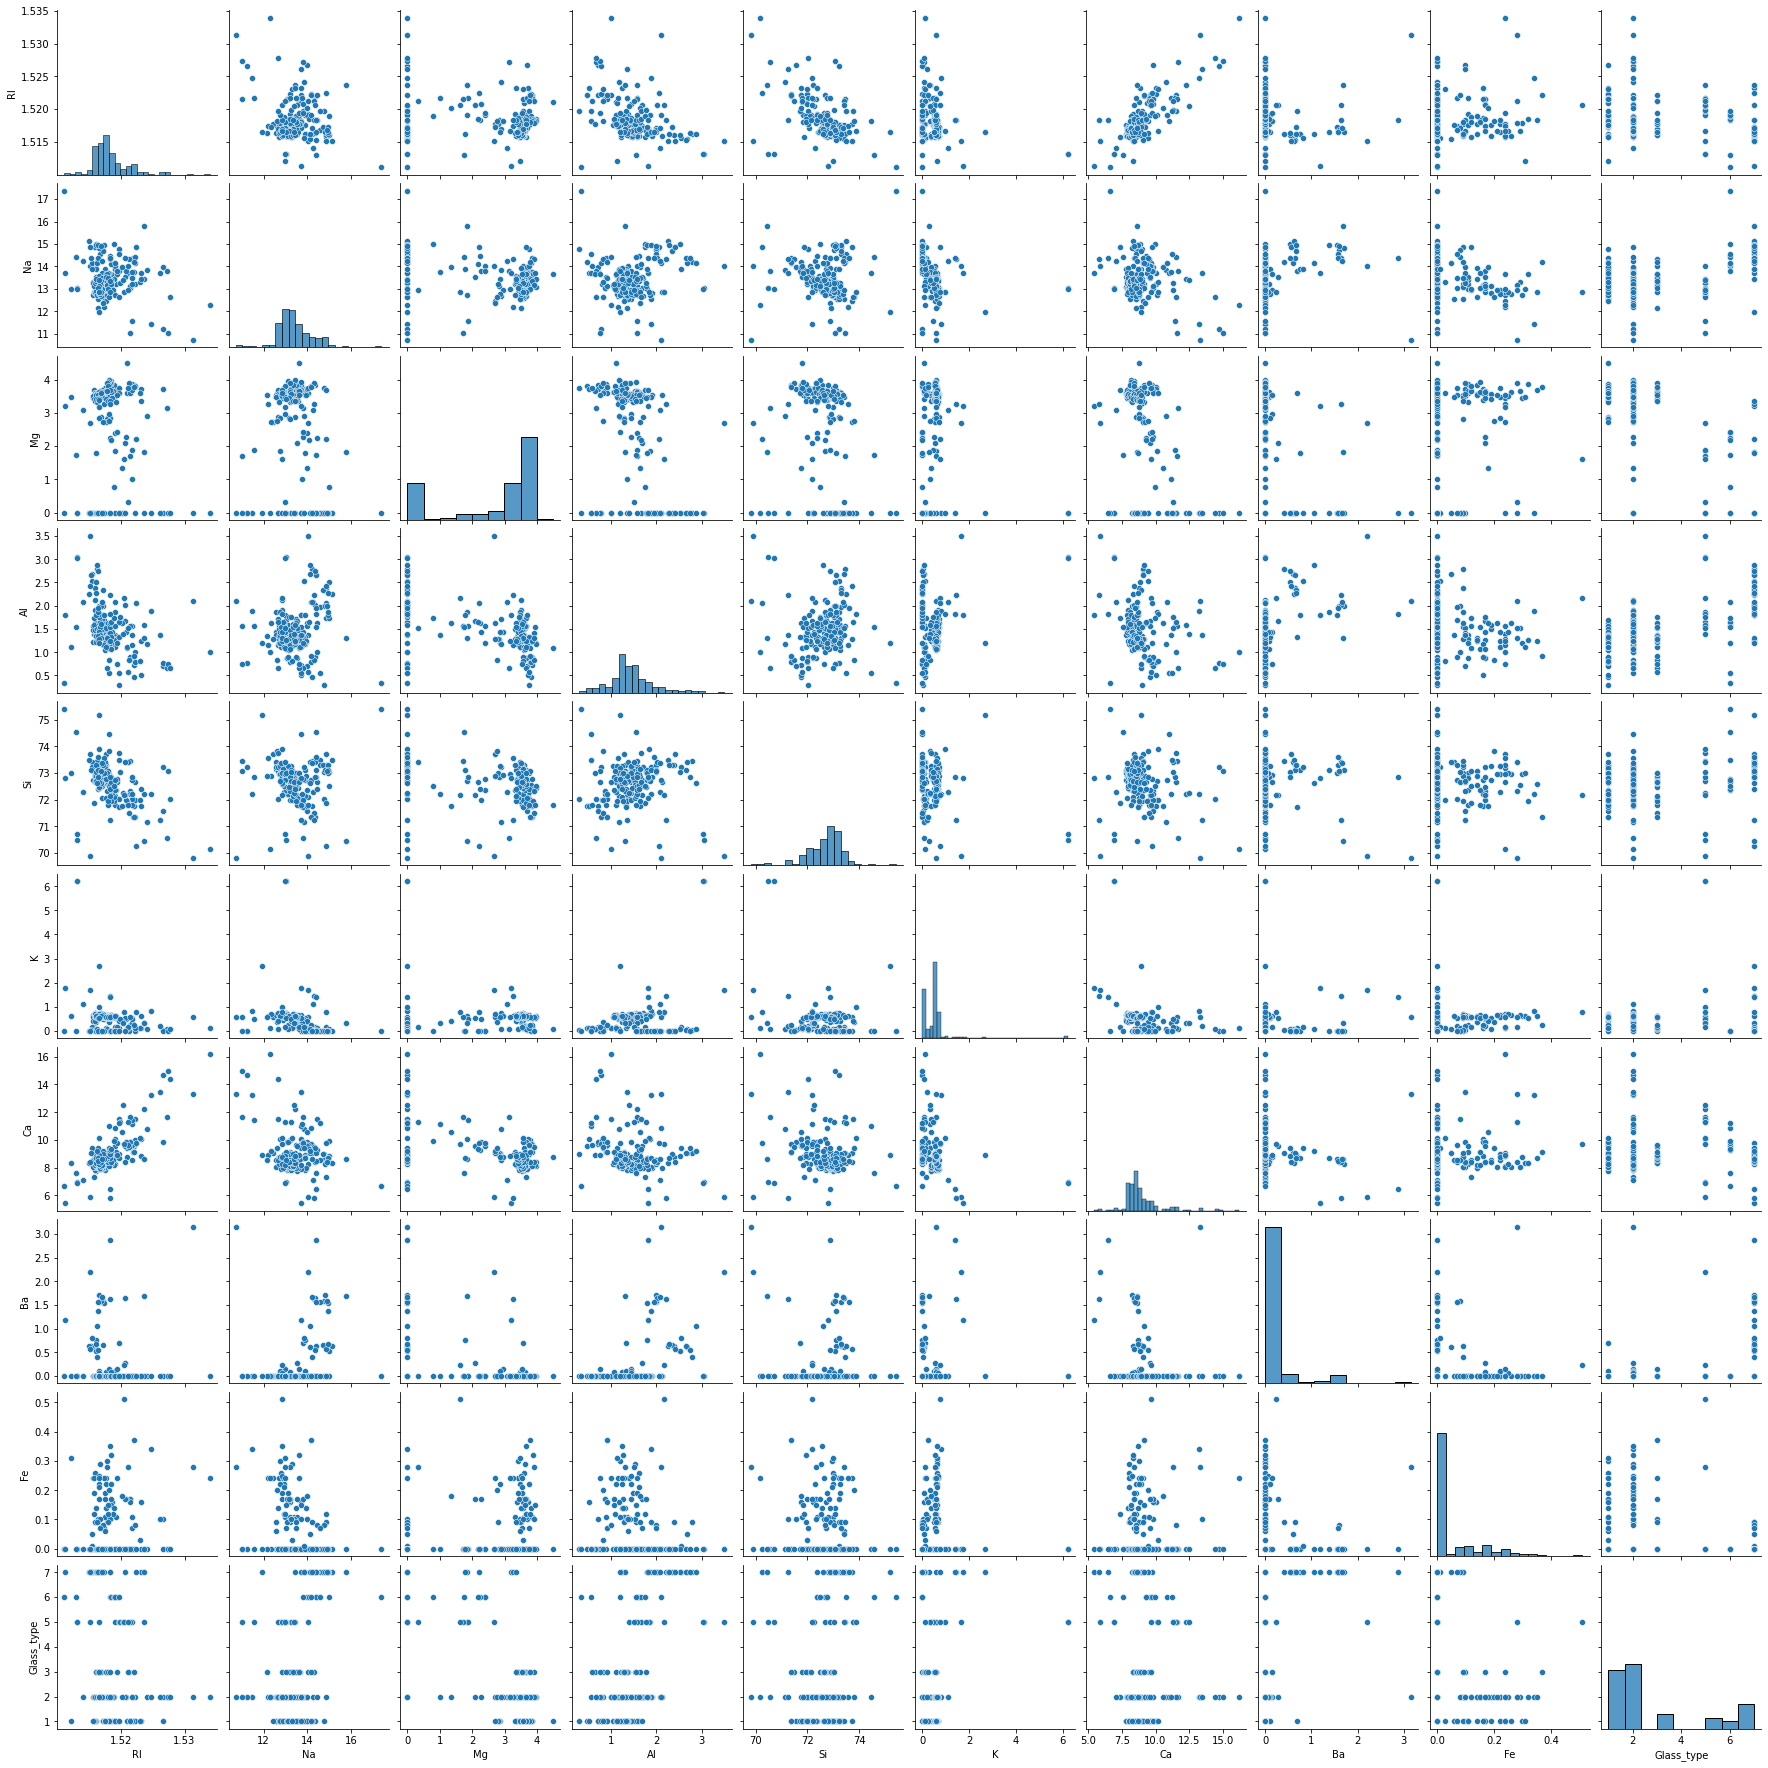

In [18]:
sns.pairplot(df)

RI
Na
Mg
Al
Si
K
Ca
Ba
Fe


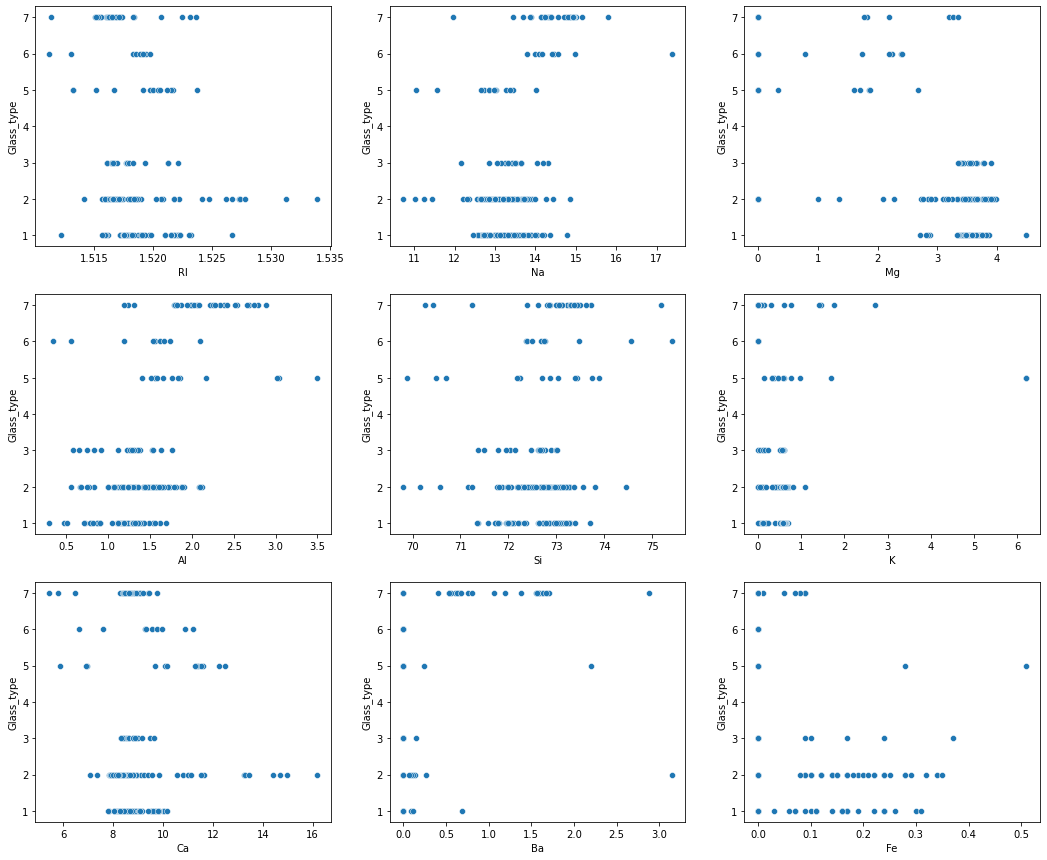

In [19]:
plt.figure(figsize=(18,15))
c=1
for i in df.drop(["Glass_type"], axis=1):
    print(i)
    plt.subplot(3,3,c)
    sns.scatterplot(x=i, y="Glass_type",data =df)
    c+=1

most of the glass under type 1,2,3 contains Magnisium.

Barium content is more in type 7 glass where as type 1 and 2 glasses have more Fe content.

<AxesSubplot:>

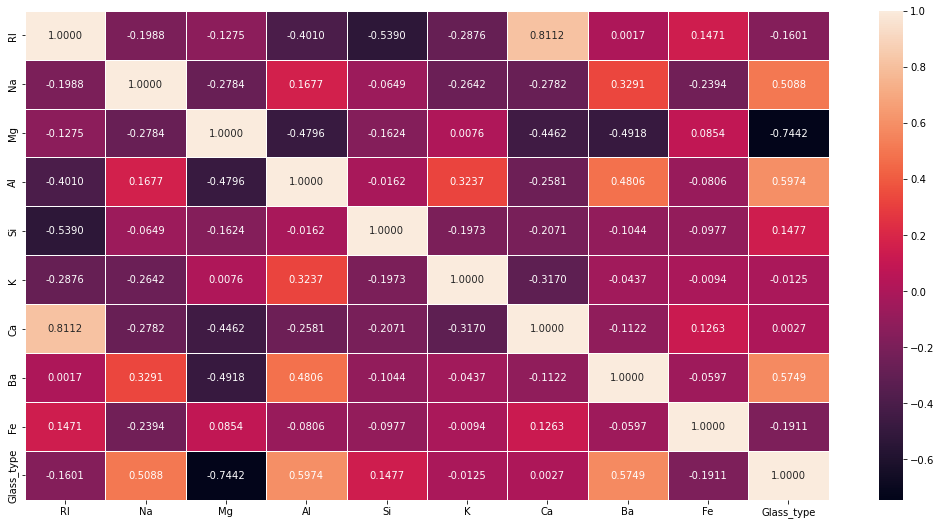

In [20]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, fmt='.4f', linewidth=0.5, linecolor='white')

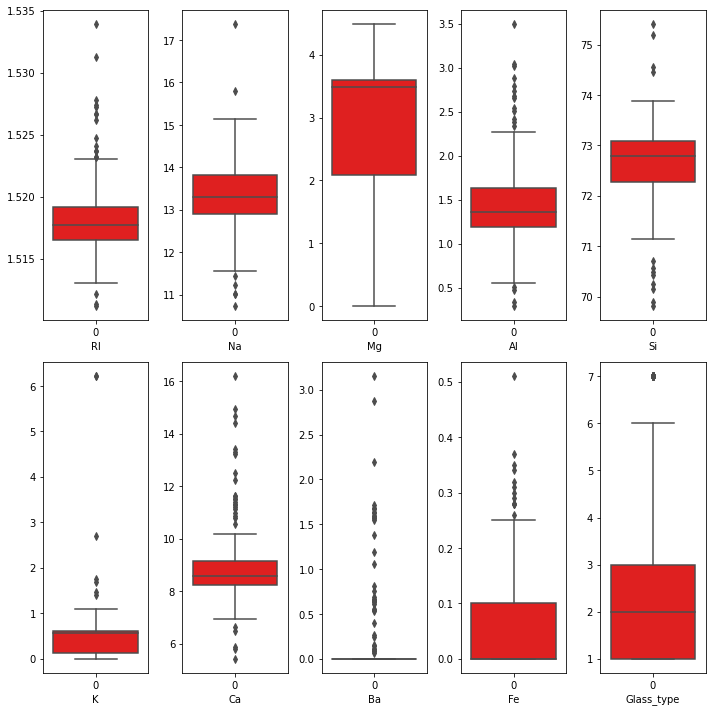

In [21]:
plt.figure(figsize=(10,10))
c=1
for i in df.columns:
    plt.subplot(2,5,c)
    sns.boxplot(data=df[i], orient='v', color='red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

In [22]:
from scipy.stats import stats

In [23]:
z=stats.zscore(df.drop('Glass_type',axis=1))
t=np.abs(z)

filt= (t<3).all(axis=1)

df=df[filt]

In [24]:
df.shape

(193, 10)

In [25]:
df['Glass_type'].value_counts()

1    69
2    68
7    23
3    16
5     9
6     8
Name: Glass_type, dtype: int64

In [26]:
df['Glass_type']= np.where(df['Glass_type'] < 5,1,2)

In [27]:
df['Glass_type'].value_counts()

1    153
2     40
Name: Glass_type, dtype: int64

#### Split features and label

In [28]:
x= df.drop("Glass_type",axis=1)
y= df['Glass_type']

x.shape, y.shape

((193, 9), (193,))

#### Balancing the data

In [29]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(0.9)
X,Y= sm.fit_resample(x,y)

In [30]:
X.shape, Y.shape

((290, 9), (290,))

In [31]:
Y.value_counts()

1    153
2    137
Name: Glass_type, dtype: int64

#### Normalization

In [32]:
ss= StandardScaler()
x=ss.fit_transform(X)
y=Y

#### Model

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

In [51]:
'''#finding random_state

models=[LogisticRegression(),DecisionTreeClassifier(), SVC()]

for m in models:
    mdl= m
    acc=0
    rs=0
    print("\nStarting with",m)
    for i in range(201):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)
        
        mdl.fit(x_train,y_train)
        Y= mdl.predict(x_test)
        accuracy=accuracy_score(y_test,Y)
        
        if accuracy>acc:
            acc=accuracy
            rs=i
            print("Accuracy now is {0}, at random state {1}".format(acc,rs))'''

'#finding random_state\n\nmodels=[LogisticRegression(),DecisionTreeClassifier(), SVC()]\n\nfor m in models:\n    mdl= m\n    acc=0\n    rs=0\n    print("\nStarting with",m)\n    for i in range(201):\n        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)\n        \n        mdl.fit(x_train,y_train)\n        Y= mdl.predict(x_test)\n        accuracy=accuracy_score(y_test,Y)\n        \n        if accuracy>acc:\n            acc=accuracy\n            rs=i\n            print("Accuracy now is {0}, at random state {1}".format(acc,rs))'

In [52]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=15)

In [53]:
lr= LogisticRegression()

lr.fit(x_train, y_train)

print("Accuracy of training data is", accuracy_score(y_train,lr.predict(x_train)))

y_predlr=lr.predict(x_test)

acc_lr= accuracy_score(y_test,y_predlr)
print("Testing data accuracy is",acc_lr)

Accuracy of training data is 0.9612068965517241
Testing data accuracy is 1.0


In [54]:
confusion_matrix(y_test,y_predlr)

array([[35,  0],
       [ 0, 23]], dtype=int64)

In [55]:
print(classification_report(y_test, y_predlr))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        23

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [56]:
y_predlr

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1])

#### AUC-ROC curve

In [57]:

fpr, tpr, threshold = roc_curve(y_test, y_predlr, pos_label=1)

print("Threshold", threshold)
print("FPR", fpr)
print("TPR", tpr)

Threshold [3 2 1]
FPR [0. 1. 1.]
TPR [0. 0. 1.]


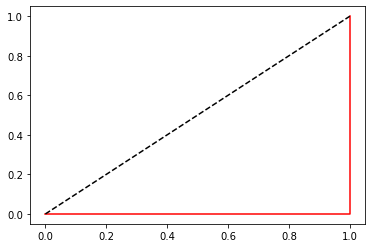

In [58]:
plt.plot(fpr, tpr,color='Red')
plt.plot([0,1],[0,1],color="Black", linestyle="--")

In [59]:
#AUC
auc= roc_auc_score(y_test, y_predlr)
auc

1.0

#### Saving Model

In [60]:
import pickle

In [61]:
#saving model
pickle.dump(lr, open('lr.pkl', 'wb'))

In [62]:
#Load model
glass= pickle.load(open('lr.pkl', 'rb'))

In [63]:
#prediction

glass.predict(x_test)

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1])